In [1]:
from dotenv import load_dotenv
load_dotenv("/Users/koundinya/Documents/prathyusha/projects/expense-management-assistant/env/.env")
import sys
sys.path.append("/Users/koundinya/Documents/prathyusha/projects/expense-management-assistant")
from agent import *
import json

In [2]:
class ExpenseManager:
    def __init__(self, image_paths):
        self.image_paths = image_paths
        self.agent = ExpenseAgent()
        self.parse_all_bills()
        self.populate_categories()
        self.calculate_category_expense()
        
    def merge_expense_reports(self, reports):
        merged_expenses =[]
        total_spent = 0
        for report in reports:
            merged_expenses.extend(report.expenses)
            total_spent+=report.total_spent
        new_report = ExpenseReport(expenses=merged_expenses, total_spent=total_spent)
        return new_report
    
    def parse_bill(self, image_path):
        expense_report = self.agent.scan_bill(image_path)
        expense_report = expense_report.choices[0].message.parsed
        return expense_report
    
    def parse_all_bills(self):
        reports = []
        for image_path in self.image_paths:
            expense_report = self.parse_bill(image_path)
            reports.append(expense_report)
        self.final_expense_report =  self.merge_expense_reports(reports)

    def populate_categories(self):
        categorized_expense_report = self.agent.categorize_expenses(self.final_expense_report)
        self.categorized_expense_report = categorized_expense_report.choices[0].message.parsed

    def calculate_category_expense(self):
        self.category_expense_report = self.agent.calculate_expenses(self.categorized_expense_report)

    def answer_user_query(self, query):
        context = {"expenses": self.categorized_expense_report, "category_expense_report": self.category_expense_report}
        response = self.agent.answer_query(query, context)
        return response



In [3]:
image_paths = ["/Users/koundinya/Documents/prathyusha/projects/bills/electricity_bill.jpg","/Users/koundinya/Documents/prathyusha/projects/bills/other_bill.jpg","/Users/koundinya/Documents/prathyusha/projects/bills/restaurant.jpg","/Users/koundinya/Documents/prathyusha/projects/bills/ticket.jpg"]

In [4]:
expense_manager = ExpenseManager(image_paths)

/Users/koundinya/Documents/prathyusha/projects/expense-management-assistant/agent.py:10: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  self.query_llm = ChatOpenAI(model="gpt-4o-mini-2024-07-18")
/Users/koundinya/Documents/prathyusha/projects/expense-management-assistant/agent.py:12: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. See LangGraph documentation for more details: https://langchain-ai.github.io/langgraph/. Refer 

In [5]:
expense_manager.categorized_expense_report

CategorizedExpenseReport(categorized_expenses=[CategorizedExpense(expense_id=1, description='Electricity bill for June 2009', category='Utilities', amount=6440.0, date='2009-06-26'), CategorizedExpense(expense_id=1, description='pillow cover', category='Shopping', amount=200.0, date='2023-10-06'), CategorizedExpense(expense_id=2, description='bedsheet bhaga', category='Shopping', amount=350.0, date='2023-10-06'), CategorizedExpense(expense_id=3, description='bedsheet medium', category='Shopping', amount=700.0, date='2023-10-06'), CategorizedExpense(expense_id=4, description='bedsheet', category='Shopping', amount=600.0, date='2023-10-06'), CategorizedExpense(expense_id=1, description='Daal Makhni', category='Groceries', amount=60.0, date='2018-04-23'), CategorizedExpense(expense_id=2, description='Plain Chapati', category='Groceries', amount=80.0, date='2018-04-23'), CategorizedExpense(expense_id=3, description='Curd Rice', category='Groceries', amount=50.0, date='2018-04-23'), Categor

In [6]:
expense_manager.category_expense_report

{'Utilities': 6440.0,
 'Shopping': 1850.0,
 'Groceries': 190.0,
 'Entertainment': 88.98,
 'Miscellaneous': 16.02}

In [7]:
response = expense_manager.answer_user_query(query="What is the highest expense category?")
response

AttributeError: 'HumanMessage' object has no attribute 'items'

In [ ]:
response

'The highest expense category is Utilities.'

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

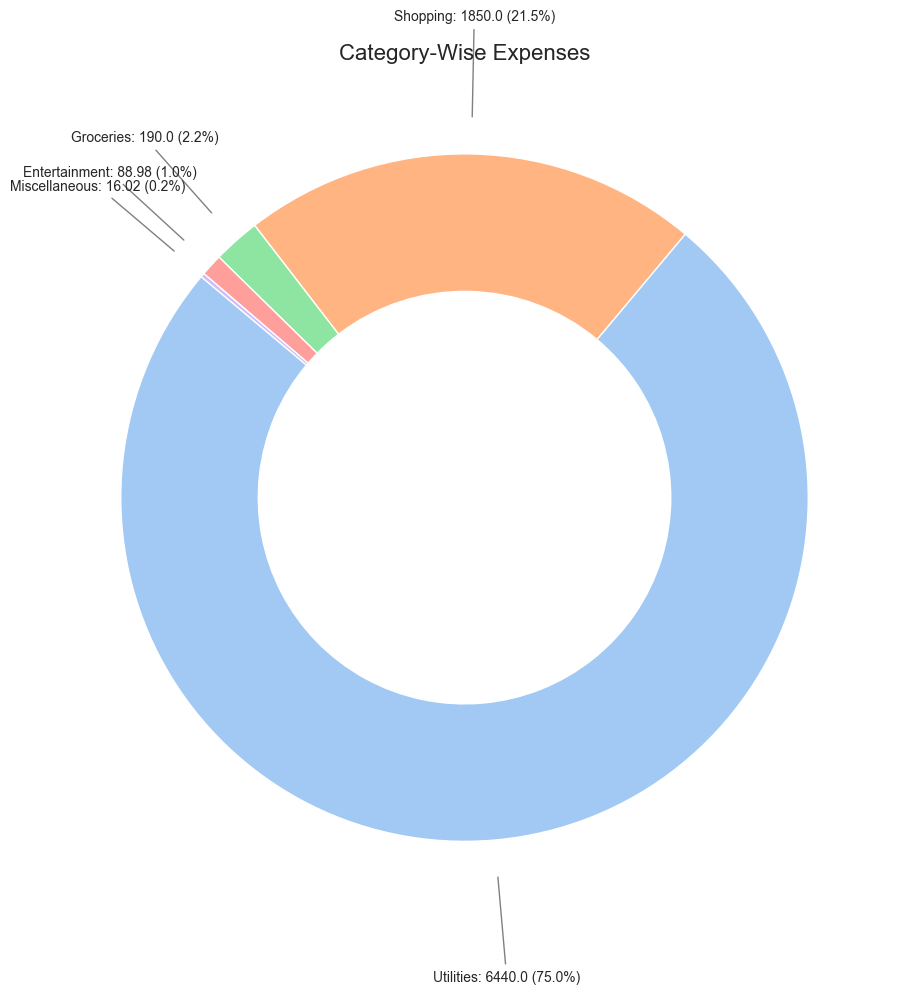

In [ ]:
category_expense_report = expense_manager.category_expense_report
"""
Creates a pie chart from the category_expense_report using Matplotlib (styled with Seaborn) 
and saves it as an image, showing both percentages and absolute values.
"""
categories = list(category_expense_report.keys())
amounts = list(category_expense_report.values())
total_amount = sum(amounts)

# Function to display both percentage and absolute values
def autopct_func(pct):
    absolute = int(round(pct * total_amount / 100.0))
    return f"{pct:.1f}%\n({absolute})"

# Create the figure
plt.figure(figsize=(10, 10))
wedges, texts = plt.pie(
    amounts,
    startangle=140,
    colors=sns.color_palette("pastel"),
    wedgeprops=dict(width=0.4),  # Creates a donut chart
)

# Custom annotation with arrows
for i, (wedge, category) in enumerate(zip(wedges, categories)):
    angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
    x = wedge.r * np.cos(np.deg2rad(angle))
    y = wedge.r *  np.sin(np.deg2rad(angle))

    # Label position (outside the wedge)
    label_x = wedge.r * 1 * np.cos(np.deg2rad(angle))
    label_y = wedge.r * 1 * np.sin(np.deg2rad(angle))

    # Draw annotation with arrow
    plt.annotate(
        f"{category}: {amounts[i]} ({round((amounts[i] / total_amount) * 100, 1)}%)",
        xy=(x, y),
        xytext=(label_x, label_y),
        arrowprops=dict(arrowstyle="-", color="gray", lw=1),
        fontsize=10,
        ha="center",
        va="center",
    )

# Add a title
plt.title("Category-Wise Expenses", fontsize=16)
plt.tight_layout()

    
